In [50]:
import pandas as pd

In [51]:
training_df = pd.read_csv("..\\train_data.csv")

In [52]:
training_df.shape

(982644, 9)

In [53]:
training_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


### S.1-Q.1. One-hot Encoding

In [54]:
from sklearn import preprocessing
from copy import deepcopy

training_df_encode = deepcopy(training_df)
training_df_encode['StateHoliday'] = training_df_encode['StateHoliday'].astype(str)
le = preprocessing.LabelEncoder()
training_df_encode['StateHoliday'] = le.fit_transform(training_df_encode['StateHoliday'].fillna(""))
training_df_encode['StateHoliday'] = training_df_encode['StateHoliday'].astype(int)

StateHoliday_LE_Map = dict(zip(le.classes_, le.transform(le.classes_)))
StateHoliday_LE_Map_reverse = dict(zip(le.transform(le.classes_), le.classes_))

In [55]:
training_df_encode.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [56]:
# training_df_encode = training_df_encode[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]

### Testing Data Processing

In [57]:
test_df = pd.read_csv("..\\test_data_hidden.csv")

### S.1-Q.1. (Reverse Part) Reverse Mapping of One hot Encoding

In [58]:
test_df['StateHoliday'] = test_df['StateHoliday'].map(StateHoliday_LE_Map_reverse)

In [59]:
test_df.shape

(34565, 9)

In [60]:
# test_df = test_df[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]

### Implementing ANN For Forecasting Sales

In [61]:
df_sale_train = training_df_encode[training_df_encode['Store'] == 1]
df_sale_train['Date']=pd.to_datetime(df_sale_train['Date'])

In [62]:
df_sale_train = df_sale_train.sort_values('Date')

In [63]:
df_sale_train.shape

(911, 9)

In [64]:
df_sale_train = df_sale_train[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]

In [65]:
df_sale_train.shape

(911, 8)

In [66]:
df_sale_test = test_df[test_df['Store'].astype(int) == 1]
df_sale_test['Date']=pd.to_datetime(df_sale_test['Date'])
df_sale_test = df_sale_test.sort_values('Date')

In [67]:
df_sale_test.shape

(31, 9)

In [68]:
from copy import deepcopy 
df_sale_test_backup = deepcopy(df_sale_test)

In [69]:
df_sale_test = df_sale_test[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]

In [70]:
df_sale_test.shape

(31, 8)

#### Train Test Splitting for ANN Model

In [71]:
import warnings
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

col_train = list(df_sale_train.columns)
col_train_bis = list(df_sale_train.columns)

col_train_bis.remove('Sales')

mat_train = np.matrix(df_sale_train)
mat_test  = np.matrix(df_sale_test)
mat_new = np.matrix(df_sale_train)
mat_y = np.array(df_sale_train.Sales).reshape((len(df_sale_train),1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train)

train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0.0,0.166667,0.000000,0.000000,0.0,0.0,0.333333,1.0
1,0.0,0.333333,0.580395,0.591150,1.0,0.0,0.000000,1.0
2,0.0,0.500000,0.454135,0.511504,1.0,0.0,0.000000,1.0
3,0.0,0.666667,0.470823,0.547788,1.0,0.0,0.000000,1.0
4,0.0,0.833333,0.524454,0.561947,1.0,0.0,0.000000,1.0


In [72]:
train.shape

(911, 8)

In [73]:
test.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0.0,0.333333,0.548174,0.497345,1.0,1.0,0.0,0.0
1,0.0,0.500000,0.583333,0.507080,1.0,1.0,0.0,0.0
2,0.0,0.666667,0.489610,0.476106,1.0,1.0,0.0,0.0
3,0.0,0.833333,0.503463,0.495575,1.0,0.0,0.0,0.0
4,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [74]:
test.shape

(31, 8)

In [75]:
train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [76]:
from sklearn.model_selection import train_test_split
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "Sales"

# Columns
feature_cols = FEATURES

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.Sales

# Train and Test 
x_train = train[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y_train = train[['Sales']]
x_test = test[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y_test = df_sale_test[['Sales']]
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

# Training for submission
training_sub = training_set[col_train]

In [77]:
training_set.shape

(911, 8)

In [78]:
training_set.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,0.0,0.166667,0.000000,0.0,0.0,0.333333,1.0,0.000000
1,0.0,0.333333,0.591150,1.0,0.0,0.000000,1.0,0.580395
2,0.0,0.500000,0.511504,1.0,0.0,0.000000,1.0,0.454135
3,0.0,0.666667,0.547788,1.0,0.0,0.000000,1.0,0.470823
4,0.0,0.833333,0.561947,1.0,0.0,0.000000,1.0,0.524454


In [79]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES)
testing_set['Sales'] = y_test.values
testing_set.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,0.0,0.333333,0.497345,1.0,1.0,0.0,0.0,5223
1,0.0,0.500000,0.507080,1.0,1.0,0.0,0.0,5558
2,0.0,0.666667,0.476106,1.0,1.0,0.0,0.0,4665
3,0.0,0.833333,0.495575,1.0,0.0,0.0,0.0,4797
4,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0


In [80]:
y_test

,Sales
33450,5223
32335,5558
31220,4665
30105,4797
28990,0
27875,4359
26760,3650
25645,3797
24530,3897
23415,3808


In [81]:
print (len(x_test))
print (len(y_test))

31
31


In [82]:
feature_cols

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

#### S.2 - Q.1.a, b, c, d, e, f.  ANN Hyperparameter Tuning

##### Grid Search CV

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [37]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=feature_cols.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

In [38]:
from keras.layers import Activation
layers = [(10,), (20,), (40, 20)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [10, 20, 30], epochs=[10, 20, 30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [41]:

feature_cols = training_set[FEATURES]
labels = training_set[LABEL].values

grid_result = grid.fit(np.array(feature_cols), np.array(labels))

In [42]:
[grid_result.best_score_,grid_result.best_params_]

[0.1723293125629425,
 {'activation': 'relu', 'batch_size': 20, 'epochs': 10, 'layers': (40, 20)}]

#### S.2 - Q.1.d. Experiment with number of epochs. Carefully observe the loss and accuracy? What are the observations?

#### S.2 - Q.1.e. Play with different  Learning Rate  variants of Gradient Descent like Adam, SGD, RMS-prop.

In [83]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=len(feature_cols), kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.RMSprop())

feature_cols = training_set[FEATURES]
labels = training_set[LABEL].values

model.fit(feature_cols, labels, epochs=10, batch_size=20)

Epoch 1/10
911/911 [==============================] - 0s 318us/step - loss: 0.0438
Epoch 2/10
911/911 [==============================] - 0s 147us/step - loss: 0.0062
Epoch 3/10
911/911 [==============================] - 0s 152us/step - loss: 0.0050
Epoch 4/10
911/911 [==============================] - 0s 227us/step - loss: 0.0043 0s - loss: 0.0
Epoch 5/10
911/911 [==============================] - 0s 153us/step - loss: 0.0037
Epoch 6/10
911/911 [==============================] - 0s 171us/step - loss: 0.0032
Epoch 7/10
911/911 [==============================] - 0s 147us/step - loss: 0.0025
Epoch 8/10
911/911 [==============================] - 0s 210us/step - loss: 0.0029
Epoch 9/10
911/911 [==============================] - 0s 176us/step - loss: 0.0025
Epoch 10/10
911/911 [==============================] - 0s 152us/step - loss: 0.0023


In [85]:
y_test

,Sales
33450,5223
32335,5558
31220,4665
30105,4797
28990,0
27875,4359
26760,3650
25645,3797
24530,3897
23415,3808


In [86]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(feature_cols), np.array(labels))

911/911 [==============================] - 0s 95us/step


0.0008992786181164941

In [87]:
import itertools
# Predictions
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values

y = model.predict(np.array(feature_cols_test))
predictions = list(itertools.islice(y, testing_set.shape[0]))

In [88]:
predictions = prepro_y.inverse_transform(np.array(predictions).reshape(len(predictions),1))

In [89]:
predictions

array([[5.0555503e+03],
       [5.0361855e+03],
       [4.7332383e+03],
       [4.6434219e+03],
       [5.8963041e+00],
       [4.2788125e+03],
       [3.8056897e+03],
       [3.8416428e+03],
       [3.8868591e+03],
       [3.7763647e+03],
       [3.8135007e+03],
       [5.8963041e+00],
       [5.3748438e+03],
       [5.1099062e+03],
       [4.9633647e+03],
       [4.6133843e+03],
       [4.5897417e+03],
       [4.3127822e+03],
       [5.8963041e+00],
       [4.1832485e+03],
       [3.6919558e+03],
       [3.6884360e+03],
       [4.0466243e+03],
       [3.8439746e+03],
       [4.2287041e+03],
       [5.8963041e+00],
       [5.9135674e+03],
       [5.3236440e+03],
       [4.8338838e+03],
       [4.8074897e+03],
       [4.7483794e+03]], dtype=float32)

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_performance(y_test, y_pred):
    # try:
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    # The mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

mse, mae, r2 = model_performance(y_test, predictions)

print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

Mean squared error: 44344.54
Mean Absolute Error: 163.50
R-Square Score: 0.98


In [91]:
df_final = pd.DataFrame()
df_final['Date'] = df_sale_test_backup['Date']
df_final['Actual_Sales'] = y_test
df_final['Predicted_Sales'] =  predictions
df_final['Predicted_Sales'] = df_final['Predicted_Sales'].astype(int)

In [92]:
df_final

,Date,Actual_Sales,Predicted_Sales
33450,2015-07-01,5223,5055
32335,2015-07-02,5558,5036
31220,2015-07-03,4665,4733
30105,2015-07-04,4797,4643
28990,2015-07-05,0,5
27875,2015-07-06,4359,4278
26760,2015-07-07,3650,3805
25645,2015-07-08,3797,3841
24530,2015-07-09,3897,3886
23415,2015-07-10,3808,3776


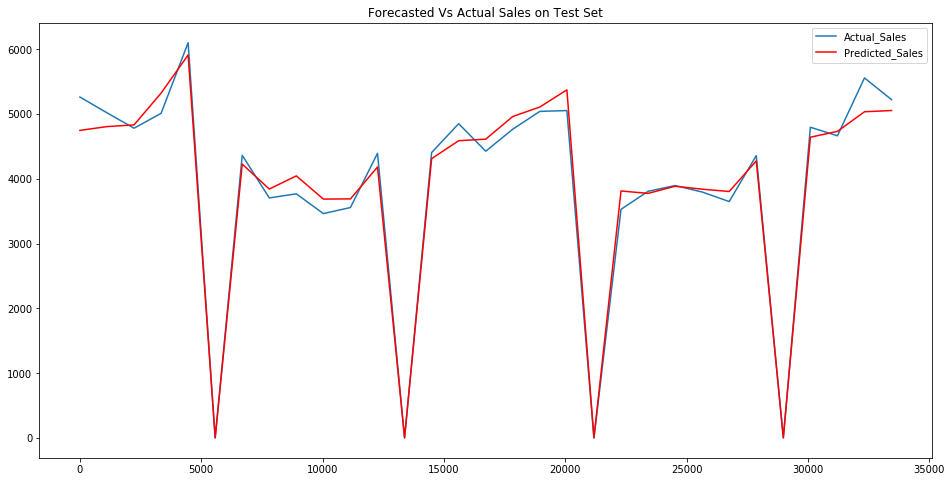

In [93]:
import matplotlib.pyplot as plt 

pd.plotting.register_matplotlib_converters()


ax = df_final['Actual_Sales'].plot(legend=True,figsize=(16,8),title="Forecasted Vs Actual Sales on Test Set")

df_final['Predicted_Sales'].plot(legend=True, color='r')

ax.autoscale(axis='x',tight=False)

#### Performances using different Optimizer with mean_squared_error loss function

##### Using Adadelta: R2: 0.97, MSE: 92485.10, MAE: 221.64

##### Using Adam: R2: 0.95, MSE: 129950.42, MAE: 289.72

##### Using SGD: R2: 0.04, MSE: 2564370.07, MAE: 1106.80

##### Using RMSProp: R2: 0.97, MSE: 82009.37, MAE: 204.10


In [94]:
feature_cols_test

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0.0,0.333333,0.497345,1.0,1.0,0.0,0.0
1,0.0,0.500000,0.507080,1.0,1.0,0.0,0.0
2,0.0,0.666667,0.476106,1.0,1.0,0.0,0.0
3,0.0,0.833333,0.495575,1.0,0.0,0.0,0.0
4,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.477876,1.0,0.0,0.0,0.0
6,0.0,0.166667,0.429204,1.0,0.0,0.0,0.0
7,0.0,0.333333,0.429204,1.0,0.0,0.0,0.0
8,0.0,0.500000,0.424779,1.0,0.0,0.0,0.0
9,0.0,0.666667,0.397345,1.0,0.0,0.0,0.0
